In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.colors as mcolors
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
colors = list(mcolors.CSS4_COLORS.keys())

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df_car=pd.read_csv("CarPrice_Assignment.csv")

In [5]:
df_car.shape

(205, 26)

In [6]:
df_car.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
print("Data: ", df_car.columns)

Data:  Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [8]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df_sum_null_app=(round((df_car.isnull().sum().T/len(df_car)*100).sort_values(ascending=False), 2))
print("Persentage of Null values in Car data: ")
print(df_sum_null_app)

Persentage of Null values in Car data: 
car_ID              0.0
symboling           0.0
highwaympg          0.0
citympg             0.0
peakrpm             0.0
horsepower          0.0
compressionratio    0.0
stroke              0.0
boreratio           0.0
fuelsystem          0.0
enginesize          0.0
cylindernumber      0.0
enginetype          0.0
curbweight          0.0
carheight           0.0
carwidth            0.0
carlength           0.0
wheelbase           0.0
enginelocation      0.0
drivewheel          0.0
carbody             0.0
doornumber          0.0
aspiration          0.0
fueltype            0.0
CarName             0.0
price               0.0
dtype: float64


In [10]:
print("Number of Columns which contains more than 50% of null values: ", (df_sum_null_app>50).sum())

Number of Columns which contains more than 50% of null values:  0


In [11]:
df_car.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [12]:
df_car.dtypes.value_counts()

object     10
int64       8
float64     8
Name: count, dtype: int64

In [13]:
df_car.describe().astype(int).T

count   mean   std   min   25%    50%    75%    max
car_ID              205    103    59     1    52    103    154    205
symboling           205      0     1    -2     0      1      2      3
wheelbase           205     98     6    86    94     97    102    120
carlength           205    174    12   141   166    173    183    208
carwidth            205     65     2    60    64     65     66     72
carheight           205     53     2    47    52     54     55     59
curbweight          205   2555   520  1488  2145   2414   2935   4066
enginesize          205    126    41    61    97    120    141    326
boreratio           205      3     0     2     3      3      3      3
stroke              205      3     0     2     3      3      3      4
compressionratio    205     10     3     7     8      9      9     23
horsepower          205    104    39    48    70     95    116    288
peakrpm             205   5125   476  4150  4800   5200   5500   6600
citympg             205     25     6    13    19     24     30     49
highwaympg          205     30     6    16    25     30     34     54
price               205  13276  7988  5118  7788  10295  16503  45400

In [14]:
df_car=df_car.round(2)
df_car_encoded=pd.get_dummies(df_car, drop_first=True)

corr_mat=df_car_encoded.corr()
cm_corr=sns.light_palette("green", as_cmap=True)
cm_corr=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
corr_mat.style.background_gradient(cmap=cm_corr)

In [15]:
df_car['CarName']=df_car['CarName'].str.split(" ", n=1, expand=True)[0]
print(df_car['CarName'])

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
30           honda
31           honda
32           honda
33           honda
34           honda
35           honda
36           honda
37           honda
38           honda
39           honda
40           honda
41           honda
42           honda
43           isuzu
44           isuzu
45           isuzu
46           isuzu
47          jaguar
48          jaguar
49          jaguar
50           maxda
51           maxda
52          

In [16]:
print(df_car.CarName.value_counts())

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64


In [17]:
df_car['Car']=df_car['CarName'].str.lower()
df_car['Car']=df_car['CarName'].str.replace('maxda', 'mazda')
df_car['Car']=df_car['CarName'].str.replace('toyouta', 'toyota')
df_car['Car']=df_car['CarName'].str.replace('vokswagen', 'volkswagen')
df_car['Car']=df_car['CarName'].str.replace('porcshce', 'porsche')
print(df_car.CarName.value_counts())

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64


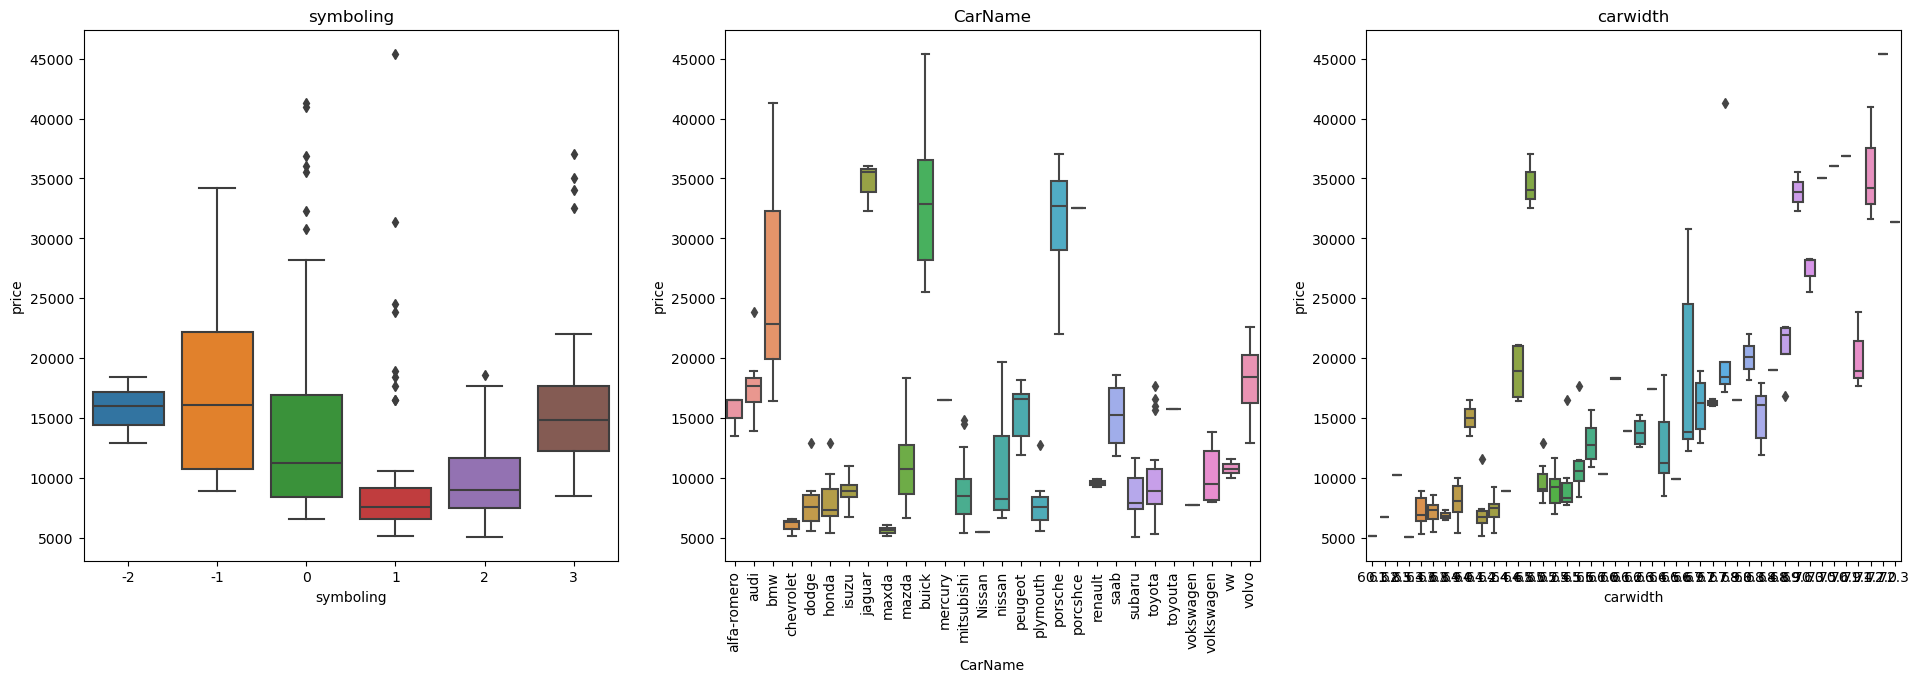

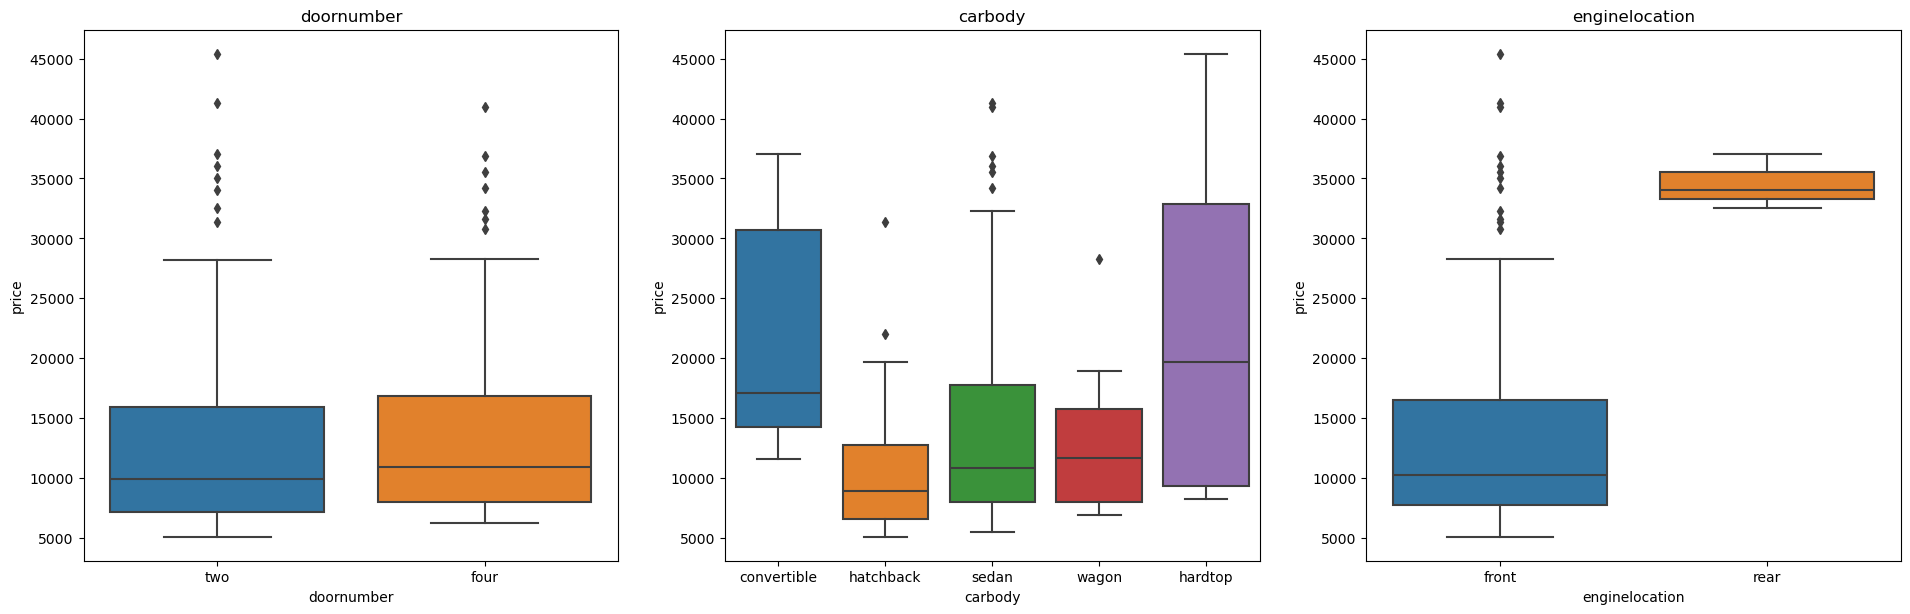

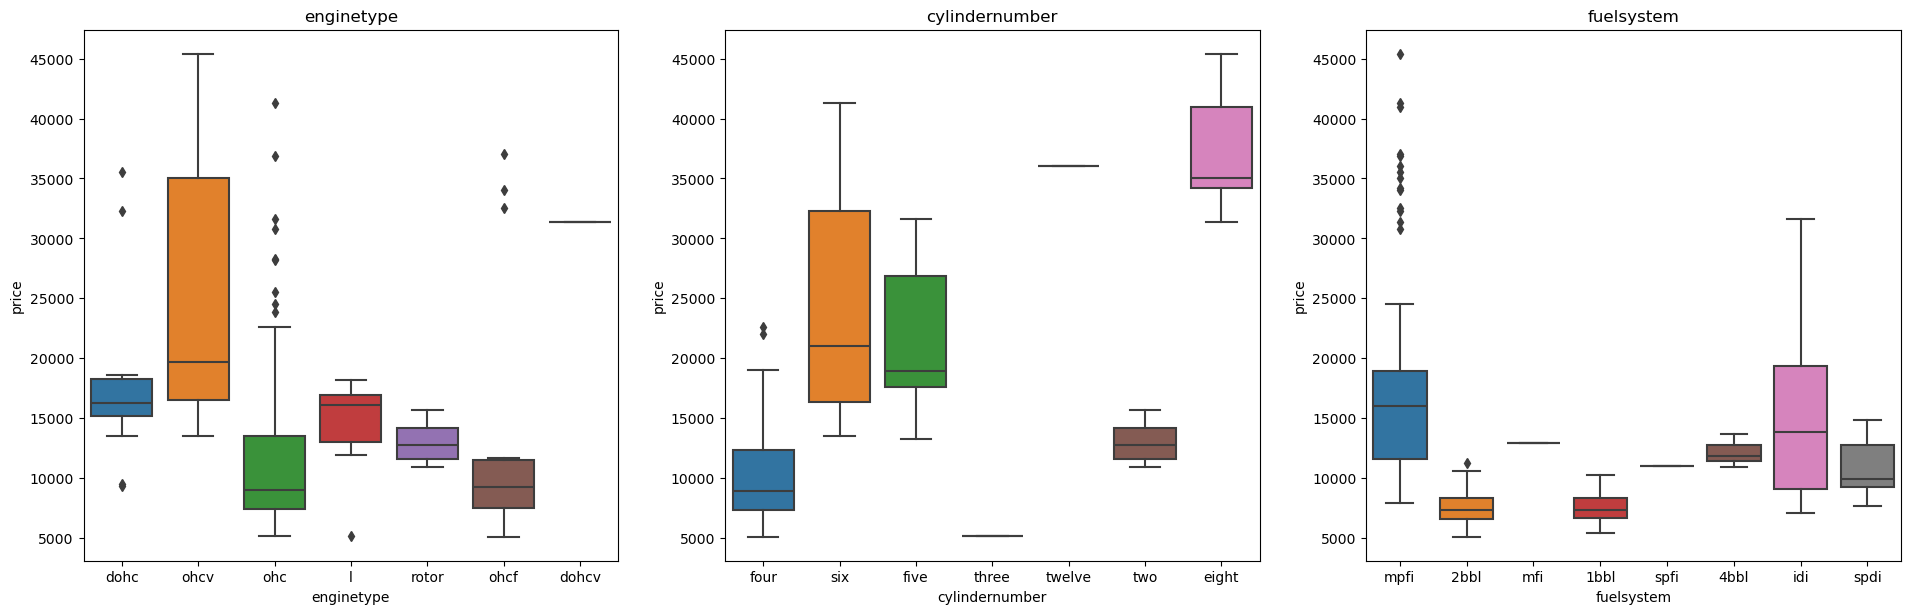

In [18]:
plt.figure(figsize=(40, 40))
plt.figure(1)

plt.subplot(5,5,1)
sns.boxplot(x='symboling', y='price', data=df_car)
plt.title('symboling')

plt.subplot(5,5,2)
sns.boxplot(x='CarName', y='price', data=df_car)
plt.title('CarName')
plt.xticks(rotation=90)

plt.subplot(5,5,3)
sns.boxplot(x='carwidth', y='price', data=df_car)
plt.title('carwidth')

plt.figure(figsize=(40, 40))
plt.figure(2)
plt.subplot(5,5,1)
sns.boxplot(x='doornumber', y='price', data=df_car)
plt.title('doornumber')

plt.subplot(5,5,2)
sns.boxplot(x='carbody', y='price', data=df_car)
plt.title('carbody')

plt.subplot(5,5,3)
sns.boxplot(x='enginelocation', y='price', data=df_car)
plt.title('enginelocation')

plt.figure(figsize=(40, 40))
plt.figure(3)
plt.subplot(5,5,1)
sns.boxplot(x='enginetype', y='price', data=df_car)
plt.title('enginetype')

plt.subplot(5,5,2)
sns.boxplot(x='cylindernumber', y='price', data=df_car)
plt.title('cylindernumber')

plt.subplot(5,5,3)
sns.boxplot(x='fuelsystem', y='price', data=df_car)
plt.title('fuelsystem')

plt.savefig('univariate_analysis for car - Boxplot')

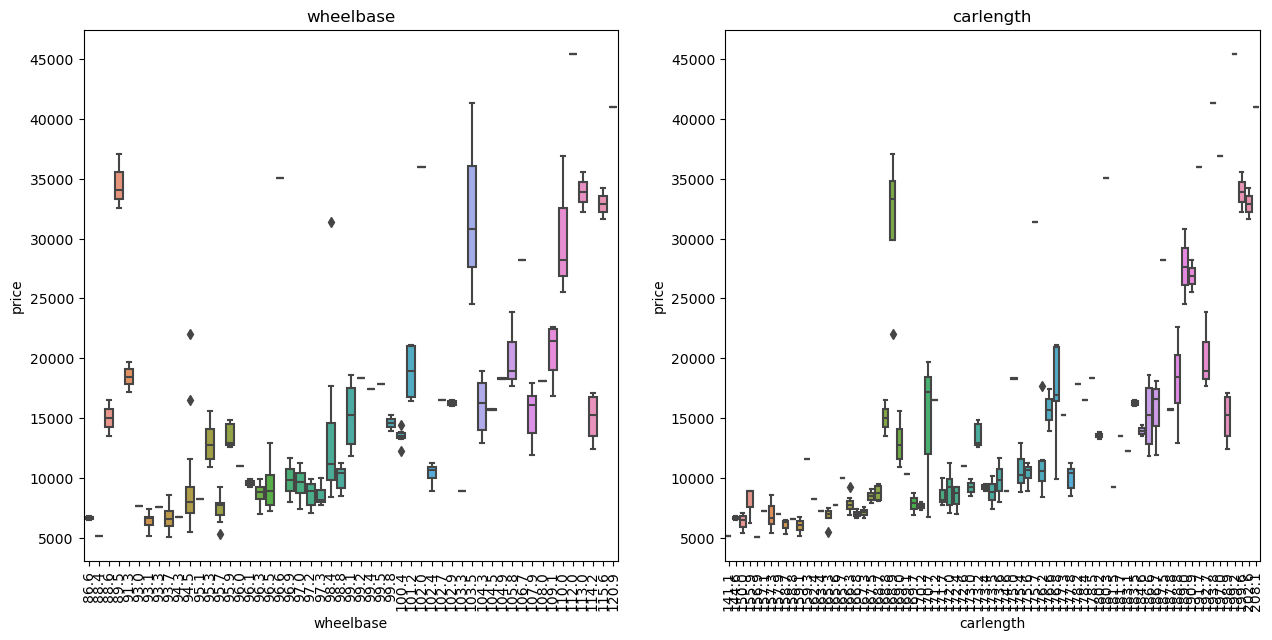

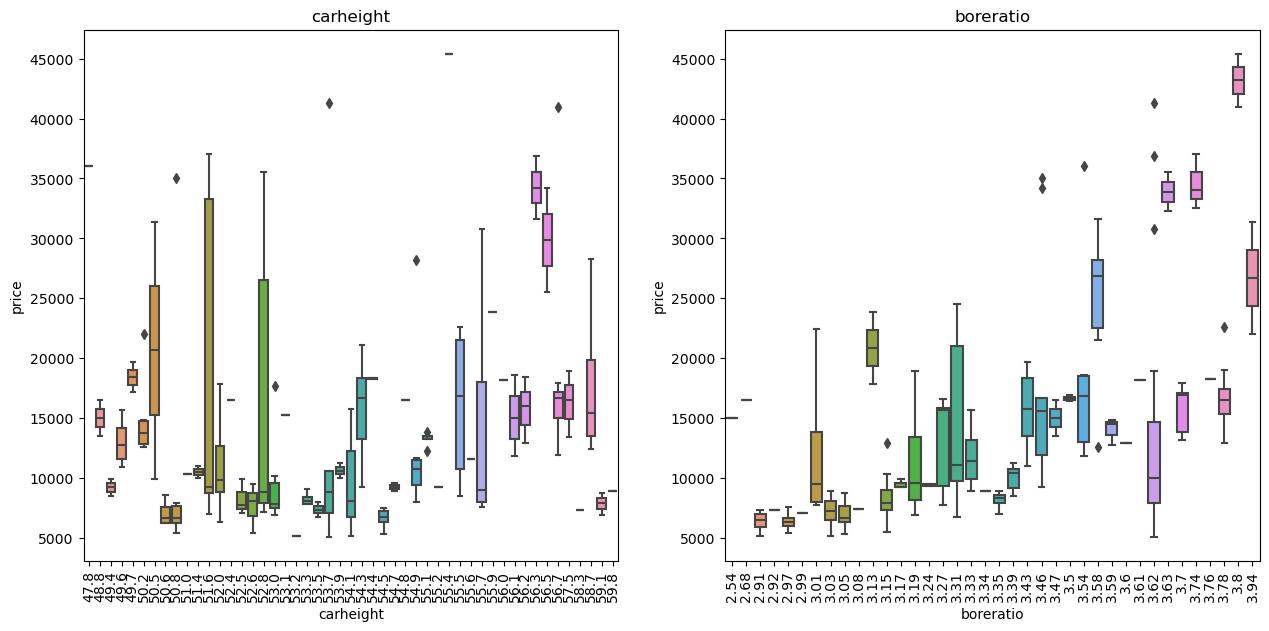

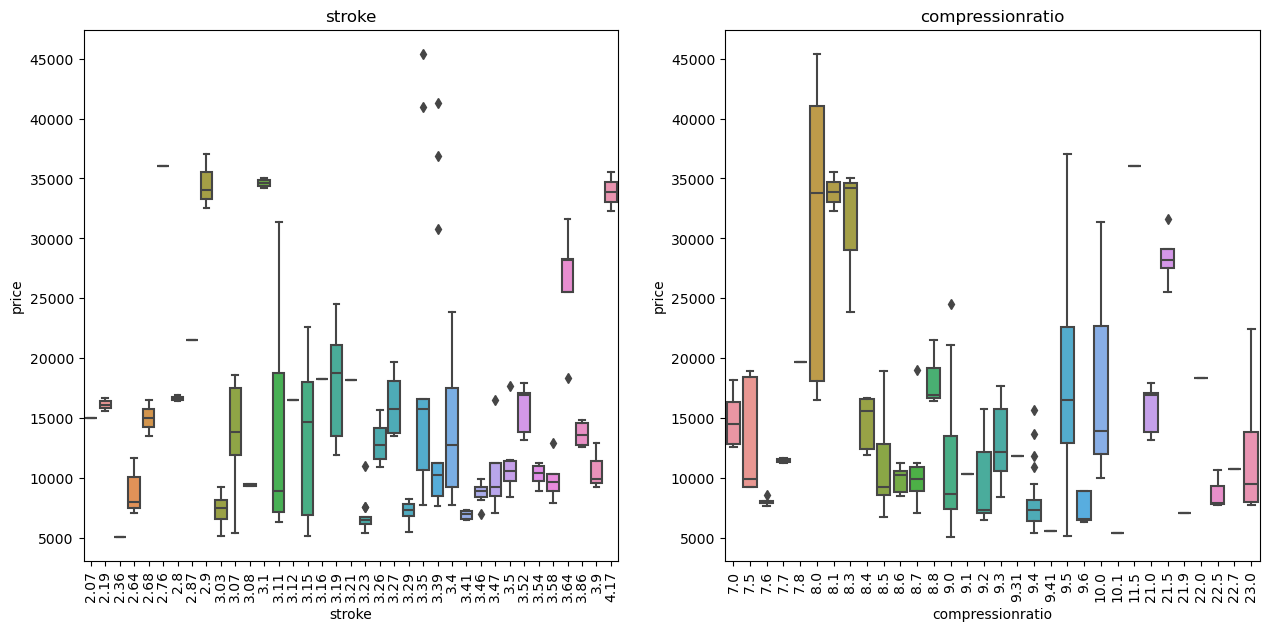

In [19]:
plt.figure(figsize=(40, 40))
plt.figure(1)

plt.subplot(5,5,1)
sns.boxplot(x='wheelbase', y='price', data=df_car)
plt.title('wheelbase')
plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.boxplot(x='carlength', y='price', data=df_car)
plt.title('carlength')
plt.xticks(rotation=90)

plt.figure(figsize=(40, 40))
plt.figure(2)

plt.subplot(5,5,1)
sns.boxplot(x='carheight', y='price', data=df_car)
plt.title('carheight')
plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.boxplot(x='boreratio', y='price', data=df_car)
plt.title('boreratio')
plt.xticks(rotation=90)

plt.figure(figsize=(40, 40))
plt.figure(3)

plt.subplot(5,5,1)
sns.boxplot(x='stroke', y='price', data=df_car)
plt.title('stroke')
plt.xticks(rotation=90)

plt.subplot(5,5,2)
sns.boxplot(x='compressionratio', y='price', data=df_car)
plt.title('compressionratio')
plt.xticks(rotation=90)

plt.savefig('univariate_analysis-1 for car - Boxplot')

In [20]:
#sns.pairplot(df_car)
#plt.savefig('Multivariate_analysis - Pair Plot')
#plt.show()

In [21]:
df_car['fueltype']=df_car['fueltype'].map({'gas':1, 'diesel':0})
df_car['aspiration']=df_car['aspiration'].map({'turbo':1, 'std':0})
df_car['doornumber']=df_car['doornumber'].map({'four':1, 'two':0})
df_car['enginelocation']=df_car['enginelocation'].map({'front':1, 'rear':0})

In [22]:
print(df_car['carbody'].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [23]:
print(df_car['drivewheel'].unique())

['rwd' 'fwd' '4wd']


In [24]:
print(df_car['enginetype'].unique())

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [25]:
print(df_car['cylindernumber'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [26]:
print(df_car['fuelsystem'].unique())

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [27]:
carbody_dummy=pd.get_dummies(df_car['carbody'])
drivewheel_dummy=pd.get_dummies(df_car['drivewheel'])
enginetype_dummy=pd.get_dummies(df_car['enginetype'])
cylindernumber_dummy=pd.get_dummies(df_car['cylindernumber'])
fuelsystem_dummy=pd.get_dummies(df_car['fuelsystem'])

In [28]:
df_car=pd.concat([df_car, carbody_dummy], axis=1)
df_car=pd.concat([df_car, drivewheel_dummy], axis=1)
df_car=pd.concat([df_car, enginetype_dummy], axis=1)
df_car=pd.concat([df_car, cylindernumber_dummy], axis=1)
df_car=pd.concat([df_car, fuelsystem_dummy], axis=1)

In [29]:
df_car.head()

car_ID  symboling      CarName  fueltype  aspiration  doornumber  \
0       1          3  alfa-romero         1           0           0   
1       2          3  alfa-romero         1           0           0   
2       3          1  alfa-romero         1           0           0   
3       4          2         audi         1           0           1   
4       5          2         audi         1           0           1   

       carbody drivewheel  enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd               1       88.6      168.8      64.1   
1  convertible        rwd               1       88.6      168.8      64.1   
2    hatchback        rwd               1       94.5      171.2      65.5   
3        sedan        fwd               1       99.8      176.6      66.2   
4        sedan        4wd               1       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price          Car  convertible  hardtop  hatchback  sedan  \
0          27  13495.0  alfa-romero         True    False      False  False   
1          27  16500.0  alfa-romero         True    False      False  False   
2          26  16500.0  alfa-romero        False    False       True  False   
3          30  13950.0         audi        False    False      False   True   
4          22  17450.0         audi        False    False      False   True   

   wagon    4wd    fwd    rwd   dohc  dohcv      l    ohc   ohcf   ohcv  \
0  False  False  False   True   True  False  False  False  False  False   
1  False  False  False   True   True  False  False  False  False  False   
2  False  False  False   True  False  False  False  False  False   True   
3  False  False   True  False  False  False  False   True  False  False   
4  False   True  False  False  False  False  False   True  False  False   

   rotor  eight   five   four    six  three  twelve    two   1bbl   2bbl  \
0  False  False  False   True  False  False   False  False  False  False   
1  False  False  False   True  False  False   False  False  False  False   
2  False  False  False  False   True  False   False  False  False  False   
3  False  False  False   True  False  False   False  False  False  False   
4  False  False   True  False  False  False   False  False  False  False   

    4bbl    idi    mfi  mpfi   spdi   spfi  
0  False  False  False  True  False  False  
1  False  False  False  True  False  False  
2  False  False  False  True  False  False  
3  False  False  False  True  False  False  
4  False  False  False  True  False  False

In [30]:
df_car=df_car.drop('carbody', axis=1)
df_car=df_car.drop('drivewheel', axis=1)
df_car=df_car.drop('enginetype', axis=1)
df_car=df_car.drop('cylindernumber', axis=1)
df_car=df_car.drop('fuelsystem', axis=1)

In [31]:
df_car.head()

car_ID  symboling      CarName  fueltype  aspiration  doornumber  \
0       1          3  alfa-romero         1           0           0   
1       2          3  alfa-romero         1           0           0   
2       3          1  alfa-romero         1           0           0   
3       4          2         audi         1           0           1   
4       5          2         audi         1           0           1   

   enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0               1       88.6      168.8      64.1       48.8        2548   
1               1       88.6      168.8      64.1       48.8        2548   
2               1       94.5      171.2      65.5       52.4        2823   
3               1       99.8      176.6      66.2       54.3        2337   
4               1       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price          Car  convertible  hardtop  hatchback  \
0       21          27  13495.0  alfa-romero         True    False      False   
1       21          27  16500.0  alfa-romero         True    False      False   
2       19          26  16500.0  alfa-romero        False    False       True   
3       24          30  13950.0         audi        False    False      False   
4       18          22  17450.0         audi        False    False      False   

   sedan  wagon    4wd    fwd    rwd   dohc  dohcv      l    ohc   ohcf  \
0  False  False  False  False   True   True  False  False  False  False   
1  False  False  False  False   True   True  False  False  False  False   
2  False  False  False  False   True  False  False  False  False  False   
3   True  False  False   True  False  False  False  False   True  False   
4   True  False   True  False  False  False  False  False   True  False   

    ohcv  rotor  eight   five   four    six  three  twelve    two   1bbl  \
0  False  False  False  False   True  False  False   False  False  False   
1  False  False  False  False   True  False  False   False  False  False   
2   True  False  False  False  False   True  False   False  False  False   
3  False  False  False  False   True  False  False   False  False  False   
4  False  False  False   True  False  False  False   False  False  False   

    2bbl   4bbl    idi    mfi  mpfi   spdi   spfi  
0  False  False  False  False  True  False  False  
1  False  False  False  False  True  False  False  
2  False  False  False  False  True  False  False  
3  False  False  False  False  True  False  False  
4  False  False  False  False  True  False  False

In [32]:
from sklearn.preprocessing import LabelEncoder

CarName_lbl=LabelEncoder()
df_car["CarName_Code"]=CarName_lbl.fit_transform(df_car["CarName"])
df_car=df_car.drop('CarName', axis=1)
print(df_car.head())

   car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
0       1          3         1           0           0               1   
1       2          3         1           0           0               1   
2       3          1         1           0           0               1   
3       4          2         1           0           1               1   
4       5          2         1           0           1               1   

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
1       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111

In [33]:
df_train, df_test=train_test_split(df_car, train_size=0.7, test_size=0.3, random_state=100)

In [34]:
scaler=MinMaxScaler()
num_vars=['wheelbase','carlength','carwidth','carheight','curbweight','enginesize'
         ,'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars]

wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122       93.7      167.3      63.8       50.8        2191          98   
125       94.5      168.9      68.3       50.2        2778         151   
166       94.5      168.7      64.0       52.6        2300          98   
1         88.6      168.8      64.1       48.8        2548         130   
199      104.3      188.8      67.2       57.5        3157         130   
190       94.5      165.7      64.0       51.4        2221         109   
96        94.5      165.3      63.8       54.5        1971          97   
177      102.4      175.6      66.5       53.9        2458         122   
181      104.5      187.8      66.5       54.1        3151         161   
97        94.5      170.2      63.8       53.5        2037          97   
120       93.7      157.3      63.8       50.6        1967          90   
117      108.0      186.7      68.3       56.0        3130         134   
57        95.3      169.0      65.7       49.6        2385          70   
44        94.5      155.9      63.6       52.0        1874          90   
153       95.7      169.7      63.6       59.1        2280          92   
85        96.3      172.4      65.4       51.6        2365         122   
127       89.5      168.9      65.0       51.6        2756         194   
151       95.7      158.7      63.6       54.5        2040          92   
204      109.1      188.8      68.9       55.5        3062         141   
10       101.2      176.8      64.8       54.3        2395         108   
20        94.5      158.8      63.6       52.0        1909          90   
170       98.4      176.2      65.6       52.0        2679         146   
82        95.9      173.2      66.3       50.2        2833         156   
12       101.2      176.8      64.8       54.3        2710         164   
16       103.5      193.8      67.9       53.7        3380         209   
178      102.9      183.5      67.7       52.0        2976         171   
90        94.5      165.3      63.8       54.5        2017         103   
89        94.5      165.3      63.8       54.5        1889          97   
45        94.5      155.9      63.6       52.0        1909          90   
161       95.7      166.3      64.4       52.8        2122          98   
116      107.9      186.7      68.4       56.7        3252         152   
189       94.5      159.3      64.2       55.6        2254         109   
192      100.4      180.2      66.9       55.1        2579          97   
148       96.9      173.6      65.4       54.9        2420         108   
51        93.1      159.1      64.2       54.1        1900          91   
175      102.4      175.6      66.5       53.9        2414         122   
39        96.5      175.4      65.2       54.1        2304         110   
163       94.5      168.7      64.0       52.6        2169          98   
37        96.5      167.5      65.2       53.3        2236         110   
6        105.8      192.7      71.4       55.7        2844         136   
54        93.1      166.8      64.2       54.1        1950          91   
25        93.7      157.3      63.8       50.6        1989          90   
21        93.7      157.3      63.8       50.8        1876          90   
48       113.0      199.6      69.6       52.8        4066         258   
9         99.5      178.2      67.9       52.0        3053         131   
23        93.7      157.3      63.8       50.8        2128          98   
35        96.5      163.4      64.0       54.5        2010          92   
112      107.9      186.7      68.4       56.7        3252         152   
50        93.1      159.1      64.2       54.1        1890          91   
62        98.8      177.8      66.5       55.5        2410         122   
145       97.0      172.0      65.4       54.3        2510         108   
146       97.0      173.5      65.4       53.0        2290         108   
19        94.5      155.9      63.6       52.0        1874          90   
194      

In [35]:
print(df_train[num_vars].describe())

        wheelbase   carlength    carwidth   carheight   curbweight  \
count  143.000000  143.000000  143.000000  143.000000   143.000000   
mean    98.523077  173.416783   65.839860   53.551748  2539.510490   
std      5.961835   12.598122    2.214203    2.433766   544.650539   
min     86.600000  141.100000   60.300000   47.800000  1488.000000   
25%     94.500000  165.650000   63.950000   51.800000  2121.000000   
50%     96.500000  172.000000   65.400000   53.700000  2405.000000   
75%    101.200000  182.300000   66.900000   55.350000  2930.500000   
max    115.600000  202.600000   72.300000   59.100000  4066.000000   

       enginesize   boreratio      stroke  compressionratio  horsepower  \
count  143.000000  143.000000  143.000000        143.000000  143.000000   
mean   124.958042    3.307413    3.250210         10.052587  102.552448   
std     40.974034    0.260997    0.312533          3.794890   39.722750   
min     61.000000    2.680000    2.190000          7.000000   48.0000

In [36]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
print(df_train[num_vars])

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122   0.244828   0.426016  0.291667   0.265487    0.272692    0.139623   
125   0.272414   0.452033  0.666667   0.212389    0.500388    0.339623   
166   0.272414   0.448780  0.308333   0.424779    0.314973    0.139623   
1     0.068966   0.450407  0.316667   0.088496    0.411171    0.260377   
199   0.610345   0.775610  0.575000   0.858407    0.647401    0.260377   
190   0.272414   0.400000  0.308333   0.318584    0.284329    0.181132   
96    0.272414   0.393496  0.291667   0.592920    0.187355    0.135849   
177   0.544828   0.560976  0.516667   0.539823    0.376261    0.230189   
181   0.617241   0.759350  0.516667   0.557522    0.645074    0.377358   
97    0.272414   0.473171  0.291667   0.504425    0.212956    0.135849   
120   0.244828   0.263415  0.291667   0.247788    0.185803    0.109434   
117   0.737931   0.741463  0.666667   0.725664    0.636928    0.275472   
57    0.300000   0.453659  0.450000   

In [37]:
print(df_train[num_vars].describe())

        wheelbase   carlength    carwidth   carheight  curbweight  enginesize  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.411141    0.525476    0.461655    0.509004    0.407878    0.241351   
std      0.205581    0.204848    0.184517    0.215378    0.211269    0.154619   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.272414    0.399187    0.304167    0.353982    0.245539    0.135849   
50%      0.341379    0.502439    0.425000    0.522124    0.355702    0.184906   
75%      0.503448    0.669919    0.550000    0.668142    0.559542    0.301887   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        boreratio      stroke  compressionratio  horsepower     peakrpm  \
count  143.000000  143.000000        143.000000  143.000000  143.000000   
mean     0.497946    0.535459          0.190787    0.227302    0.400029   
std      0.207140    0.157845          0.2371

In [38]:
y_train=df_train.pop('price')
X_train=df_train
print(y_train.head())
print(X_train.head())

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64
     car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
122     123          1         1           0           1               1   
125     126          3         1           0           0               1   
166     167          1         1           0           0               1   
1         2          3         1           0           0               1   
199     200         -1         1           1           1               1   

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122   0.244828   0.426016  0.291667   0.265487    0.272692    0.139623   
125   0.272414   0.452033  0.666667   0.212389    0.500388    0.339623   
166   0.272414   0.448780  0.308333   0.424779    0.314973    0.139623   
1     0.068966   0.450407  0.316667   0.088496    0.411171    0.260377   
199   0.610345   0.775610  0.575000   0.858407    0.647401    0.2

In [39]:
X_train_numerical = X_train.select_dtypes(include=['float64', 'int64'])
print(X_train_numerical.head())

     car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
122     123          1         1           0           1               1   
125     126          3         1           0           0               1   
166     167          1         1           0           0               1   
1         2          3         1           0           0               1   
199     200         -1         1           1           1               1   

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
122   0.244828   0.426016  0.291667   0.265487    0.272692    0.139623   
125   0.272414   0.452033  0.666667   0.212389    0.500388    0.339623   
166   0.272414   0.448780  0.308333   0.424779    0.314973    0.139623   
1     0.068966   0.450407  0.316667   0.088496    0.411171    0.260377   
199   0.610345   0.775610  0.575000   0.858407    0.647401    0.260377   

     boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  \
122   0.230159  0.52

In [40]:
y_train.shape

(143,)

In [41]:
X_train.shape

(143, 51)

In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 122 to 8
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            143 non-null    int64  
 1   symboling         143 non-null    int64  
 2   fueltype          143 non-null    int64  
 3   aspiration        143 non-null    int64  
 4   doornumber        143 non-null    int64  
 5   enginelocation    143 non-null    int64  
 6   wheelbase         143 non-null    float64
 7   carlength         143 non-null    float64
 8   carwidth          143 non-null    float64
 9   carheight         143 non-null    float64
 10  curbweight        143 non-null    float64
 11  enginesize        143 non-null    float64
 12  boreratio         143 non-null    float64
 13  stroke            143 non-null    float64
 14  compressionratio  143 non-null    float64
 15  horsepower        143 non-null    float64
 16  peakrpm           143 non-null    float64
 17  ci

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train_numerical, y_train)

rfe=RFE(estimator=lm, n_features_to_select=15)
rfe=rfe.fit(X_train_numerical, y_train)

print(list(zip(X_train_numerical.columns, rfe.support_, rfe.ranking_)))

[('car_ID', False, 5), ('symboling', False, 4), ('fueltype', True, 1), ('aspiration', False, 2), ('doornumber', True, 1), ('enginelocation', True, 1), ('wheelbase', True, 1), ('carlength', True, 1), ('carwidth', True, 1), ('carheight', False, 3), ('curbweight', True, 1), ('enginesize', True, 1), ('boreratio', True, 1), ('stroke', True, 1), ('compressionratio', True, 1), ('horsepower', True, 1), ('peakrpm', True, 1), ('citympg', True, 1), ('highwaympg', True, 1)]


In [44]:
col=X_train_numerical.columns[rfe.support_]
print(col)
col_didnotselect=X_train_numerical.columns[~rfe.support_]
print("Did not select")
print(col_didnotselect)

Index(['fueltype', 'doornumber', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')
Did not select
Index(['car_ID', 'symboling', 'aspiration', 'carheight'], dtype='object')


In [45]:
X_train_rfe=X_train_numerical[col]
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train, X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     51.51
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.56e-46
Time:                        14:18:41   Log-Likelihood:                 156.93
No. Observations:                 143   AIC:                            -281.9
Df Residuals:                     127   BIC:                            -234.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3003      0.235  

In [46]:
X_train_new=X_train_rfe.drop(['compressionratio'], axis=1)
X_train_lm=sm.add_constant(X_train_new)
lm=sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     55.62
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           2.05e-47
Time:                        14:18:41   Log-Likelihood:                 156.93
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     128   BIC:                            -239.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3136      0.134      2.

In [47]:
X_train_new_1=X_train_new.drop(['horsepower'], axis=1)
X_train_lm_1=sm.add_constant(X_train_new_1)
lm=sm.OLS(y_train, X_train_lm_1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     60.01
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.56e-48
Time:                        14:18:41   Log-Likelihood:                 156.57
No. Observations:                 143   AIC:                            -285.1
Df Residuals:                     129   BIC:                            -243.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3213      0.134      2.

In [48]:
X_train_new_2=X_train_new_1.drop(['wheelbase'], axis=1)
X_train_lm_2=sm.add_constant(X_train_new_2)
lm=sm.OLS(y_train, X_train_lm_2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     64.95
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           6.92e-49
Time:                        14:18:41   Log-Likelihood:                 156.03
No. Observations:                 143   AIC:                            -286.1
Df Residuals:                     130   BIC:                            -247.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2990      0.132      2.

In [49]:
X_train_new_3=X_train_new_2.drop(['carlength'], axis=1)
X_train_lm_3=sm.add_constant(X_train_new_3)
lm=sm.OLS(y_train, X_train_lm_3).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     71.14
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           9.82e-50
Time:                        14:18:41   Log-Likelihood:                 155.81
No. Observations:                 143   AIC:                            -287.6
Df Residuals:                     131   BIC:                            -252.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2904      0.131      2.

In [50]:
X_train_new_4=X_train_new_3.drop(['highwaympg'], axis=1)
X_train_lm_4=sm.add_constant(X_train_new_4)
lm=sm.OLS(y_train, X_train_lm_4).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     78.29
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.60e-50
Time:                        14:18:41   Log-Likelihood:                 155.37
No. Observations:                 143   AIC:                            -288.7
Df Residuals:                     132   BIC:                            -256.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3095      0.129      2.

In [51]:
X_train_new_5=X_train_new_4.drop(['citympg'], axis=1)
X_train_lm_5=sm.add_constant(X_train_new_5)
lm=sm.OLS(y_train, X_train_lm_5).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     87.46
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.86e-51
Time:                        14:18:41   Log-Likelihood:                 155.24
No. Observations:                 143   AIC:                            -290.5
Df Residuals:                     133   BIC:                            -260.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2724      0.104      2.

In [52]:
X_train_new_6=X_train_new_5.drop(['fueltype'], axis=1)
X_train_lm_6=sm.add_constant(X_train_new_6)
lm=sm.OLS(y_train, X_train_lm_6).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     97.75
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           4.02e-52
Time:                        14:18:41   Log-Likelihood:                 154.39
No. Observations:                 143   AIC:                            -290.8
Df Residuals:                     134   BIC:                            -264.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2556      0.104      2.

In [53]:
X_train_new_7=X_train_new_6.drop(['boreratio'], axis=1)
X_train_lm_7=sm.add_constant(X_train_new_7)
lm=sm.OLS(y_train, X_train_lm_7).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     110.1
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.28e-52
Time:                        14:18:42   Log-Likelihood:                 153.04
No. Observations:                 143   AIC:                            -290.1
Df Residuals:                     135   BIC:                            -266.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1938      0.097      2.

In [54]:
X_train_new_8=X_train_new_7.drop(['stroke'], axis=1)
X_train_lm_8=sm.add_constant(X_train_new_8)
lm=sm.OLS(y_train, X_train_lm_8).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     126.7
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           3.63e-53
Time:                        14:18:42   Log-Likelihood:                 151.76
No. Observations:                 143   AIC:                            -289.5
Df Residuals:                     136   BIC:                            -268.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1792      0.097      1.

In [55]:
X_train_new_9=X_train_new_8.drop(['doornumber'], axis=1)
X_train_lm_9=sm.add_constant(X_train_new_9)
lm=sm.OLS(y_train, X_train_lm_9).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.8
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           9.83e-54
Time:                        14:18:42   Log-Likelihood:                 150.44
No. Observations:                 143   AIC:                            -288.9
Df Residuals:                     137   BIC:                            -271.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1601      0.096      1.

In [56]:
print(X_train_new_9.columns)
X_train_new_10=X_train_new_9.drop(['const'], axis=1)

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'peakrpm'],
      dtype='object')


In [57]:
vif=pd.DataFrame()
X=X_train_new_10
vif['Features']=X.columns

In [58]:
X.shape

(143, 5)

In [59]:
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by="VIF", ascending=False)
print(vif)

         Features    VIF
2      curbweight  35.22
1        carwidth  32.01
3      enginesize  13.87
0  enginelocation  12.37
4         peakrpm   5.14


In [60]:
y_train_price=lm.predict(X_train_lm_9)
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Subrata\AppData\Local\Temp\ipykernel_15708\909245166.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train-y_train_price), bins=20)
D:\Software\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Errors')

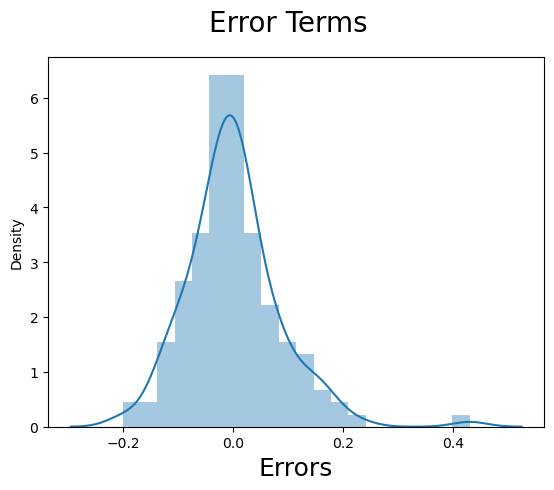

In [61]:
fig=plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)

In [62]:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars]=scaler.transform(df_test[num_vars])
print(df_test.head())
df_test[num_vars].describe()

     car_ID  symboling  fueltype  aspiration  doornumber  enginelocation  \
160     161          0         1           0           1               1   
186     187          2         1           0           1               1   
59       60          1         1           0           0               1   
165     166          1         1           0           0               1   
140     141          2         1           0           0               1   

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
160   0.313793   0.409756  0.341667   0.460177    0.235066    0.139623   
186   0.368966   0.497561  0.433333   0.699115    0.305275    0.181132   
59    0.420690   0.596748  0.516667   0.522124    0.347944    0.230189   
165   0.272414   0.448780  0.308333   0.424779    0.301396    0.139623   
140   0.231034   0.263415  0.291667   0.699115    0.291699    0.177358   

     boreratio    stroke  compressionratio  horsepower   peakrpm   citympg  \
160   0.404762  0.42

wheelbase  carlength   carwidth  carheight  curbweight  enginesize  \
count  62.000000  62.000000  62.000000  62.000000   62.000000   62.000000   
mean    0.437764   0.559481   0.480376   0.559663    0.428470    0.265673   
std     0.212861   0.189947   0.165440   0.215811    0.179488    0.162820   
min     0.000000   0.056911   0.183333   0.141593    0.128394    0.067925   
25%     0.313793   0.459350   0.358333   0.384956    0.305275    0.177358   
50%     0.387931   0.547967   0.441667   0.588496    0.406129    0.226415   
75%     0.570690   0.719919   0.516667   0.699115    0.564876    0.316038   
max     1.182759   1.089431   0.975000   1.061947    0.935609    0.932075   

       boreratio     stroke  compressionratio  horsepower    peakrpm  \
count  62.000000  62.000000         62.000000   62.000000  62.000000   
mean    0.556580   0.544314          0.209375    0.248858   0.393351   
std     0.228484   0.160738          0.273690    0.163376   0.192092   
min    -0.111111  -0.060606          0.000000    0.016667   0.000000   
25%     0.404762   0.484848          0.093750    0.107292   0.265306   
50%     0.563492   0.585859          0.125000    0.218750   0.346939   
75%     0.746032   0.641414          0.150000    0.295833   0.540816   
max     0.888889   0.863636          1.000000    0.662500   1.000000   

         citympg  highwaympg      price  
count  62.000000   62.000000  62.000000  
mean    0.328405    0.363993   0.239439  
std     0.172009    0.181845   0.233076  
min     0.027778   -0.027027   0.007763  
25%     0.166667    0.216216   0.092342  
50%     0.305556    0.351351   0.158991  
75%     0.444444    0.459459   0.317243  
max     0.694444    0.810811   1.112855

In [63]:
y_test=df_test.pop('price')
X_test=df_test

In [64]:
X_train_new.columns

Index(['const', 'fueltype', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [65]:
X_test_new = X_test[X_train_new_10.columns]
X_test_new = sm.add_constant(X_test_new)
y_pred = lm.predict(X_test_new)

In [66]:
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8779329840747538


Text(0, 0.5, 'y_pred')

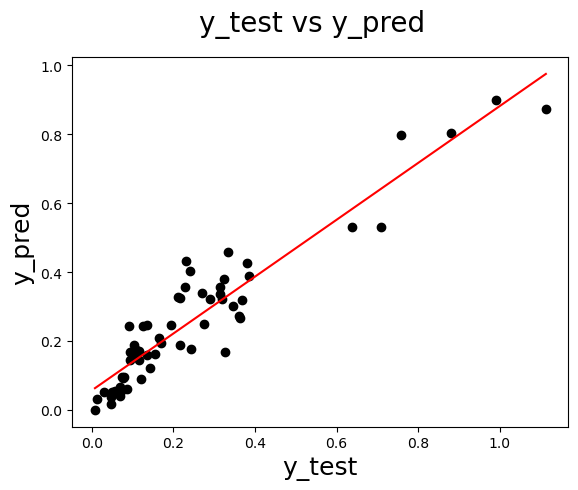

In [67]:
fig=plt.figure()
plt.scatter(y_test, y_pred, color='black')

line=np.polyfit(y_test, y_pred, 1)

predict=np.poly1d(line)

x_line=np.linspace(min(y_test), max(y_test), 100)
y_line=predict(x_line)

plt.plot(x_line, y_line, color='red')

fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=18)